In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.6 MB/s eta 0:00:00


In [ ]:
# مشروع: نظام تشخيص مبدئي لأمراض السكري باستخدام المنطق الضبابي

# بناء نموذج ضبابي لتقديم تشخيص مبدئي لاحتمال إصابة شخص بمرض السكري بناءً على

# مستوى السكر في الدم
# مؤشر كتلة الجسم (BMI)
# العمر
# الناتج هو درجة احتمالية (من "منخفض" إلى "مرتفع") أن يكون الشخص مصابًا بالسكري

درجة خطر الإصابة بالسكري: 80.00000000000007


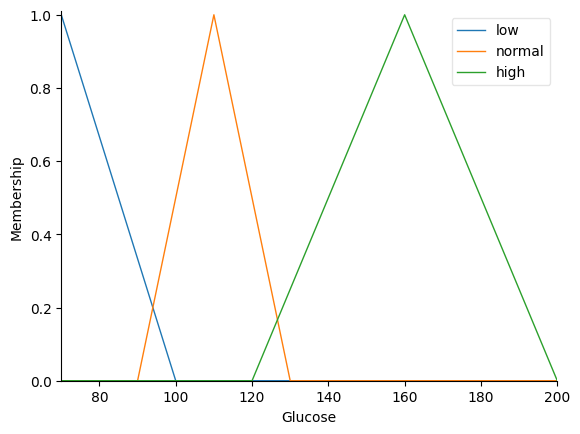

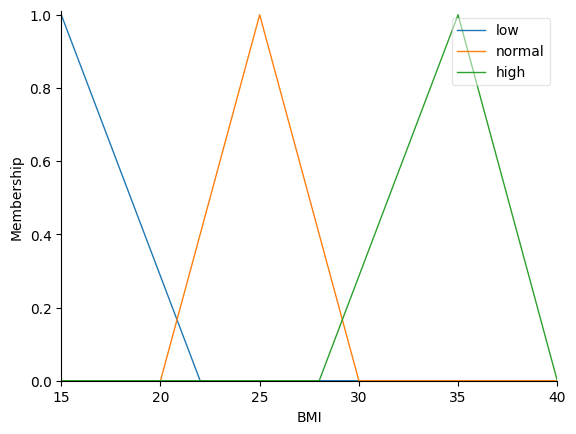

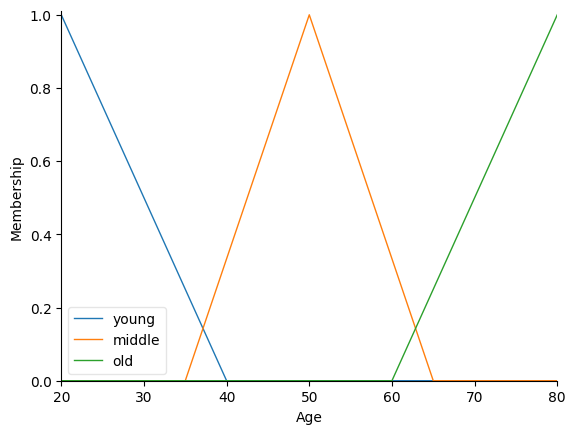

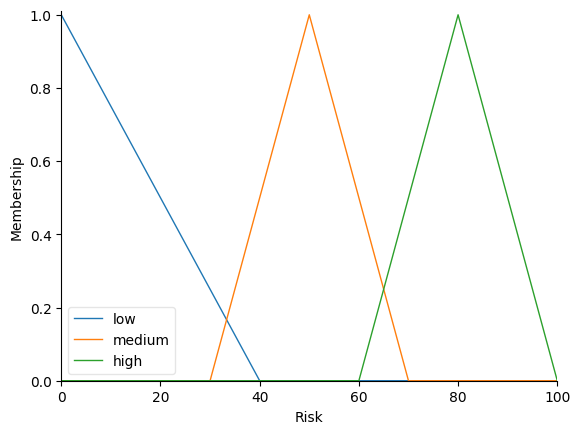

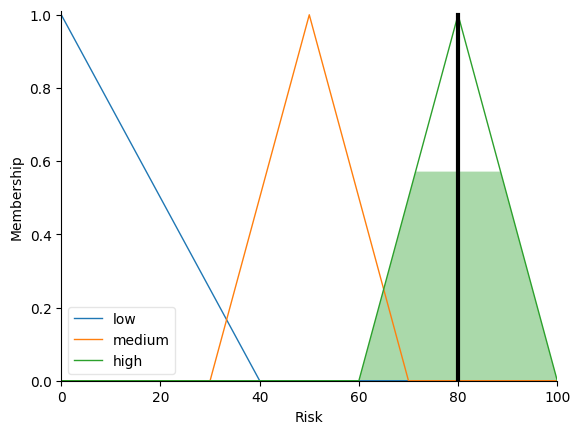

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. تعريف المتغيرات الضبابية
glucose = ctrl.Antecedent(np.arange(70, 201, 5), 'Glucose')
bmi = ctrl.Antecedent(np.arange(15, 41, 1), 'BMI')
age = ctrl.Antecedent(np.arange(20, 81, 1), 'Age')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'Risk')

# 2. تحديد الدوال الضبابية لكل متغير
# مستويات السكر
glucose['low'] = fuzz.trimf(glucose.universe, [70, 70, 100])
glucose['normal'] = fuzz.trimf(glucose.universe, [90, 110, 130])
glucose['high'] = fuzz.trimf(glucose.universe, [120, 160, 200])

# مؤشر كتلة الجسم
bmi['low'] = fuzz.trimf(bmi.universe, [15, 15, 22])
bmi['normal'] = fuzz.trimf(bmi.universe, [20, 25, 30])
bmi['high'] = fuzz.trimf(bmi.universe, [28, 35, 40])

# العمر
age['young'] = fuzz.trimf(age.universe, [20, 20, 40])
age['middle'] = fuzz.trimf(age.universe, [35, 50, 65])
age['old'] = fuzz.trimf(age.universe, [60, 80, 80])

# خطر السكري
risk['low'] = fuzz.trimf(risk.universe, [0, 0, 40])
risk['medium'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['high'] = fuzz.trimf(risk.universe, [60, 80, 100])

# 3. رسم الدوال
glucose.view()
bmi.view()
age.view()
risk.view()

# 4. وضع القواعد
rule1 = ctrl.Rule(glucose['high'] & bmi['high'], risk['high'])
rule2 = ctrl.Rule(glucose['high'] & age['old'], risk['high'])
rule3 = ctrl.Rule(glucose['normal'] & bmi['normal'], risk['medium'])
rule4 = ctrl.Rule(glucose['normal'] & age['middle'], risk['medium'])
rule5 = ctrl.Rule(glucose['low'] & bmi['low'], risk['low'])
rule6 = ctrl.Rule(glucose['low'] & age['young'], risk['low'])

# 5. إنشاء نظام التحكم
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
risk_sim = ctrl.ControlSystemSimulation(risk_ctrl)

# 6. إدخال قيم مثال
risk_sim.input['Glucose'] = 150
risk_sim.input['BMI'] = 32
risk_sim.input['Age'] = 55

# 7. تشغيل النظام
risk_sim.compute()

# 8. عرض النتيجة
print("درجة خطر الإصابة بالسكري:", risk_sim.output['Risk'])
risk.view(sim=risk_sim)
plt.show()